In [1]:
import mnist_loader
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from collections import defaultdict

#Take a source and a destination image
#Return an array of 10 images including src and dst

def morph(src,dst):
    
    #Convert floats to 0-255 integers
    src =(src*255/max(src)).astype(int)
    dst =(dst*255/max(dst)).astype(int)
    
    num = 8     #that many transitions
    num = num+2 #that many frames in total

    results=[]
    
    #Calculate in-between images
    #Start from 100% src 0% dst
    #End with 0% src 100% dst
    for i in range(num):
        src_ratio = 1.0*(num-1-i)/(num-1)
        dst_ratio = 1.0*i/(num-1)
        tmp = (src*src_ratio+dst*dst_ratio).astype(int)
        results.append(tmp)
    
    return results

In [2]:
#Load MNIST data
trn,val,tst = mnist_loader.load_data()

#Create a dictionary with digits
T = defaultdict(list)
for img,digit in zip(trn[0],trn[1]):
    T[digit].append(img)

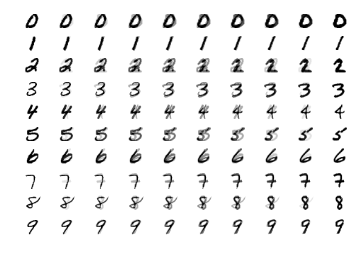

In [5]:
#To show an example: Pick two random images for each digit
fig = plt.figure()
for d in range(10):
    i1,i2 = random.sample(xrange(len(T[d])-1),2) #get two random numbers
    src,dst = T[d][i1],T[d][i2]                  #get two images
    numbers = morph(src,dst)                     #get morphed images
    
    for i in range(0,len(numbers)):
        fig.add_subplot(10,10,(d*10)+(i+1))      #row,col,current
        plt.imshow(numbers[i].reshape(28,28),cmap=cm.gray_r)
        plt.axis('off')  
    
fig.show()
